In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance



(Może wystąpić błąd, ale dane załadowały się poprawinie). Tutaj wystąpił jakiś problem, aczkolwiek w google colab załadowało sie te API (pracujemy w pycharm), dlatego załączamy csv.

In [ ]:
df = pd.read_csv('data.csv')
df


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


## Opis zmiennych w zbiorze danych (Diabetes Dataset)

| Skrót | Pełna nazwa | Opis |
|-------|-------------|------|
| `preg` | Number of pregnancies | Liczba ciąż — ile razy pacjentka była w ciąży. |
| `plas` | Plasma glucose concentration | Poziom glukozy w osoczu na czczo — pomiar po min. 8 godzinach od ostatniego posiłku. |
| `pres` | Diastolic blood pressure | Rozkurczowe ciśnienie krwi (w mm Hg). |
| `skin` | Triceps skin fold thickness | Grubość fałdu skórnego na tricepsie (w mm). |
| `insu` | 2-Hour serum insulin | Poziom insuliny w surowicy 2 godziny po posiłku (µU/ml). |
| `mass` | Body Mass Index (BMI) | Wskaźnik masy ciała — masa (kg) podzielona przez wzrost² (m²). |
| `pedi` | Diabetes pedigree function | Czynnik genetyczny cukrzycy — wskaźnik oparty na historii rodzinnej. |
| `age`  | Age | Wiek pacjenta (w latach). |


In [ ]:
zeros_count = (df == 0).sum()
zeros_count

,0
preg,111
plas,5
pres,35
skin,227
insu,374
mass,11
pedi,0
age,0
class,0


Napotykamy tutaj na kluczowy problem, część wierszy ma wartości zerowe, które w przypadkach plas, pres, skin, insu, mas oznaczają brak danych. Musimy usunąć te wiersze, lub zastąpić je np. modą. Zastosujemy drugie podejście i zastąpimy brakujace wartości modą czyli najczęściej występującą wartością dla danej zmiennej. Następnie zamienimy typ kolumny class na 0-1 (0 brak cukrzycy, 1 jest cukrzyca).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
df['class'] = df['class'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [ ]:
columns = ['plas', 'pres', 'skin', 'insu', 'mass']

for col in columns:
    median_value = df[df[col] != 0][col].median()
    df[col] = df[col].replace(0, median_value)

In [ ]:
zeros_count = (df == 0).sum()
zeros_count

,0
preg,111
plas,0
pres,0
skin,0
insu,0
mass,0
pedi,0
age,0
class,0


Widzimy, że już żadna z kolumn, (poza ilością ciąż która może być równa 0), nie zawiera pustych wartości. Teraz tylko przekaształcamy wartości w kolumnie class na 0 i 1.

In [ ]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


In [ ]:
h20df= df.copy()
h20df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insu'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

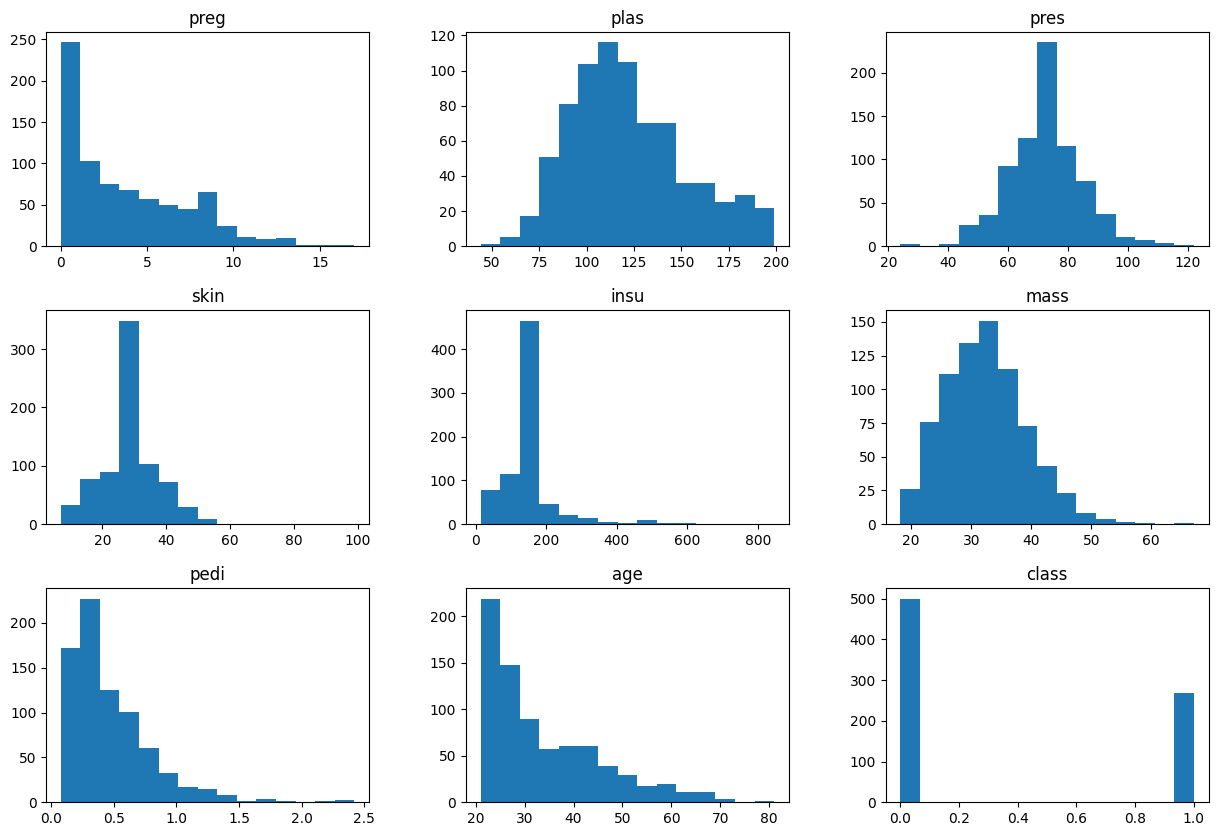

In [ ]:
df.hist(bins=15,figsize=(15, 10),grid=False)

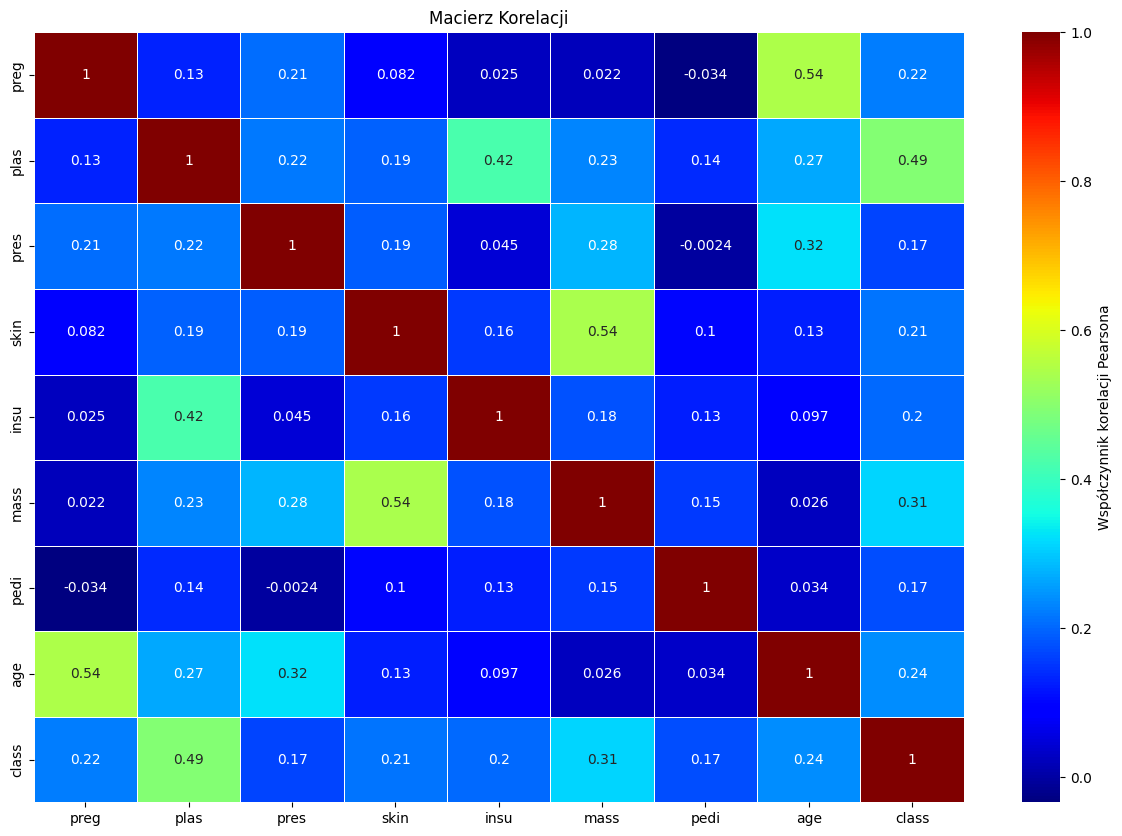

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,cmap='jet',linewidths=.5,linecolor='white',cbar_kws={"label": 'Współczynnik korelacji Pearsona'})
plt.title('Macierz Korelacji')
plt.show()


In [ ]:
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


,preg,plas,pres,skin,insu,mass,pedi,age
60,2,84,72,29,125,32.3,0.304,21
618,9,112,82,24,125,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,29,125,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,29,125,22.4,0.207,27
270,10,101,86,37,125,45.6,1.136,38
435,0,141,72,29,125,42.4,0.205,29


Gdy nasze dane zostały uporządkowane, możemy je rozdzielić na treningowe i testowe w stosunku 80% do 20%.

W zbiorze testowym jest 614 obserwacji, natomiast w zbiorze testowym 154 obserwacje. Zmienna docelowa class jest objaśniana przez 8 atrybutów.

In [ ]:

numeric_cols = ['preg','plas', 'pres', 'skin', 'insu', 'mass','pedi']

def log_transform_selected_cols(X):
    X = X.copy()
    for col in ['insu', 'pedi']:
        X[col] = np.log10(X[col] + 1e-5)  # unikanie log(0)
    return X

log_transformer = FunctionTransformer(log_transform_selected_cols, validate=False)

numeric_pipeline = Pipeline([
    ('zv', VarianceThreshold(threshold=0.0)),
    ('scaler', StandardScaler()),
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
])

full_pipeline = Pipeline([
    ('log_transform', log_transformer),
    ('preprocessor', preprocessor),
])
full_pipeline.set_output(transform="pandas")

train_transformed = full_pipeline.fit_transform(X_train)
test_transformed = full_pipeline.transform(X_test)

def remove_highly_correlated(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return df.drop(columns=to_drop), to_drop

train_transformed, dropped_columns = remove_highly_correlated(train_transformed, threshold=0.9)

print("Usunięte kolumny z powodu wysokiej korelacji:", dropped_columns)


Usunięte kolumny z powodu wysokiej korelacji: []


In [ ]:
train_transformed.round(3).describe()

,num__preg,num__plas,num__pres,num__skin,num__insu,num__mass,num__pedi
count,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.00014,-0.000005,-0.000018,-0.000129,-0.000223,0.000007,0.000005
std,1.00078,1.000809,1.000797,1.000742,1.000796,1.000814,1.000826
min,-1.13100,-2.587000,-3.989000,-2.464000,-4.365000,-2.042000,-2.452000
25%,-0.82800,-0.725000,-0.681000,-0.561000,-0.123000,-0.725500,-0.701750
50%,-0.22400,-0.160000,-0.019000,0.034000,0.026000,-0.051000,-0.030000
75%,0.68200,0.572000,0.643000,0.391000,0.101250,0.580500,0.743500
max,4.00500,2.566000,4.117000,4.079000,3.862000,5.014000,2.869000


In [ ]:
train_transformed

,num__preg,num__plas,num__pres,num__skin,num__insu,num__mass,num__pedi
60,-0.526397,-1.256881,-0.018995,0.034298,0.026498,-0.007450,-0.344750
618,1.588046,-0.326051,0.808174,-0.560583,0.026498,-0.599092,1.884795
346,-0.828460,0.571536,-2.169636,-1.155463,-0.794794,-0.526941,0.842063
294,-1.130523,1.302903,-1.838768,0.034298,0.026498,-1.508200,-0.623127
231,0.681856,0.405316,0.642740,0.986106,2.203094,1.998360,-0.723922
...,...,...,...,...,...,...,...
71,0.379793,0.571536,-0.680731,0.748154,0.253805,-0.541371,0.122434
106,-0.828460,-0.857954,4.116852,0.034298,0.026498,-1.436049,-0.940111
270,1.890109,-0.691734,1.139042,0.986106,0.026498,1.911778,1.697481
435,-1.130523,0.638024,-0.018995,0.034298,0.026498,1.450009,-0.955152


In [ ]:
def features_engenering(train_X, train_y, test_X, test_y):
    results = []

    models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs', C=1.0, penalty='l2')),

    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, random_state=42)),

    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),

    ('SVM', SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42))

    ]


    for name, model in models:
        pipeline = Pipeline([
            ('model', model)
        ])

        pipeline.fit(train_X, train_y)
        y_pred = pipeline.predict(test_X)

        results.append({
            'Model': name,
            'Accuracy': accuracy_score(test_y, y_pred),
            'F1-Score': f1_score(test_y, y_pred, zero_division=0),
            'auc': roc_auc_score(test_y, y_pred)
        })

    return pd.DataFrame(results)


In [ ]:
features_engenering(train_transformed,y_train,test_transformed,y_test)

,Model,Accuracy,F1-Score,auc
0,Logistic Regression,0.766234,0.653846,0.733333
1,Random Forest,0.759740,0.672566,0.744444
2,Gradient Boosting,0.759740,0.666667,0.740404
3,SVM,0.759740,0.640777,0.724242


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(train_transformed, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.764 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)


In [ ]:
best_svm_model = grid.best_estimator_


In [ ]:
X_train_pred = best_svm_model.predict(train_transformed)
training_data_accuracy = accuracy_score(X_train_pred, y_train)
print('Accuracy score(training data): ', training_data_accuracy)

Accuracy score(training data):  0.7638436482084691


In [ ]:
X_test_pred = best_svm_model.predict(test_transformed)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
f1_score= f1_score(X_test_pred, y_test, zero_division=0)
print('Accuracy score of the test data : ', test_data_accuracy)
print('F1-score of the test data : ', f1_score)

Accuracy score of the test data :  0.7857142857142857
F1-score of the test data :  0.6666666666666666


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(title)
    plt.grid(False)
    plt.show()

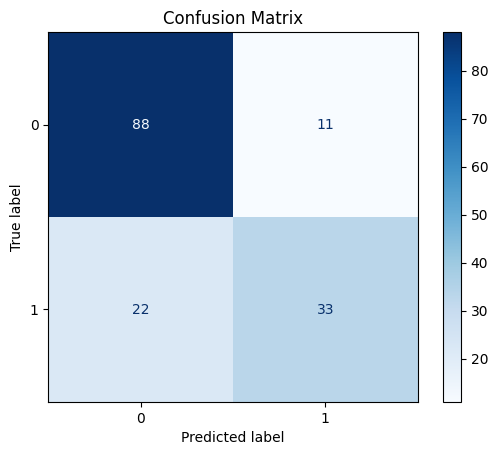

In [ ]:
plot_confusion_matrix(y_test, X_test_pred, 'Confusion Matrix')

In [ ]:
!pip install h2o

In [ ]:
import h2o


In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,17 mins 00 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_9mtwlj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.150 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
diabetes_df = h2o.H2OFrame(h20df)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train, valid, test = diabetes_df.split_frame(ratios=[0.6,0.2], seed=1234)

In [ ]:
from h2o.automl import H2OAutoML
predictors = diabetes_df.columns[:-1]
response = "class"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
10:51:01.987: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_5_20250512_105101


GLM Model: summary
    family    link    regularization              lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    binomial  logit   Ridge ( lambda = 0.01197 )  nlambda = 30, lambda.max = 24.469, lambda.min = 0.01197, lambda.1se = 0.1296  8                             8                              34                      AutoML_5_20250512_105101_training_py_32_sid_8ccf

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1473643601571871
RMSE: 0.3838806587432963
LogLoss: 0.4573169901366354
AUC: 0.8558951525164201
AUCPR: 0.7401577875035726
Gini: 0.7117903050328402
Null degrees of freedom: 464
Residual degrees of freedom: 456
Null deviance: 606.0495845742382
Residual deviance: 425.30480082707095
AIC: 443.30480082707095

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.293816729705108
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      216  83   0.2776   (83.0/299.0)
1      27   139  0.1627   (27.0/166.0)
Total  243  222  0.2366   (110.0/465.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.293817     0.716495  204
max f2                       0.141281     0.817452  299
max f0point5                 0.561633     0.734323  99
max accuracy                 0.473957     0.793548  126
max precision                0.989211     1         0
max recall                   0.057424     1         370
max specificity              0.989211     1         0
max absolute_mcc             0.379305     0.550136  157
max min_per_class_accuracy   0.333047     0.77592   180
max mean_per_class_accuracy  0.293817     0.779879  204
max tns                      0.989211     299       0
max fns                      0.989211     165       0
max fps                      0.0132608    299       399
max tps                      0.057424     166       370
max tnr                      0.989211     1         0
max fnr                      0.989211     0.993976  0
max fpr                      0.0132608    1         399
max tpr                      0.057424     1         370

Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.70 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0107527                   0.949306           1.68072    1.68072            0.6              0.965168   0.6                         0.965168            0.0180723       0.0180723                  68.0723   68.0723            0.0113833
2        0.0215054                   0.926879           2.8012     2.24096            1                0.943046   0.8                         0.954107            0.0301205       0.0481928                  180.12    124.096            0.0415038
3        0.0301075                   0.901873           1.4006     2.00086            0.5              0.915544   0.714286                    0.943089            0.0120482       0.060241                   40.0602   100.086        

In [ ]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_5_20250512_105101,0.843091,0.475367,0.718108,0.232169,0.392072,0.15372
XRT_1_AutoML_5_20250512_105101,0.842104,0.532789,0.745914,0.211438,0.390648,0.152606
StackedEnsemble_BestOfFamily_1_AutoML_5_20250512_105101,0.840583,0.483126,0.721399,0.22813,0.391405,0.153198
GBM_4_AutoML_5_20250512_105101,0.834368,0.476873,0.733023,0.248539,0.395576,0.15648
StackedEnsemble_AllModels_1_AutoML_5_20250512_105101,0.832252,0.491079,0.715829,0.245527,0.396111,0.156904
GBM_2_AutoML_5_20250512_105101,0.828898,0.486041,0.72339,0.238234,0.396852,0.157491
DRF_1_AutoML_5_20250512_105101,0.825815,0.620811,0.735362,0.230517,0.39841,0.15873
GBM_3_AutoML_5_20250512_105101,0.820778,0.490816,0.718316,0.250554,0.401035,0.160829
GBM_1_AutoML_5_20250512_105101,0.81968,0.495224,0.682254,0.234849,0.403365,0.162703
XGBoost_3_AutoML_5_20250512_105101,0.81555,0.517368,0.715611,0.242243,0.407012,0.165658


In [ ]:
best_model = aml.leader


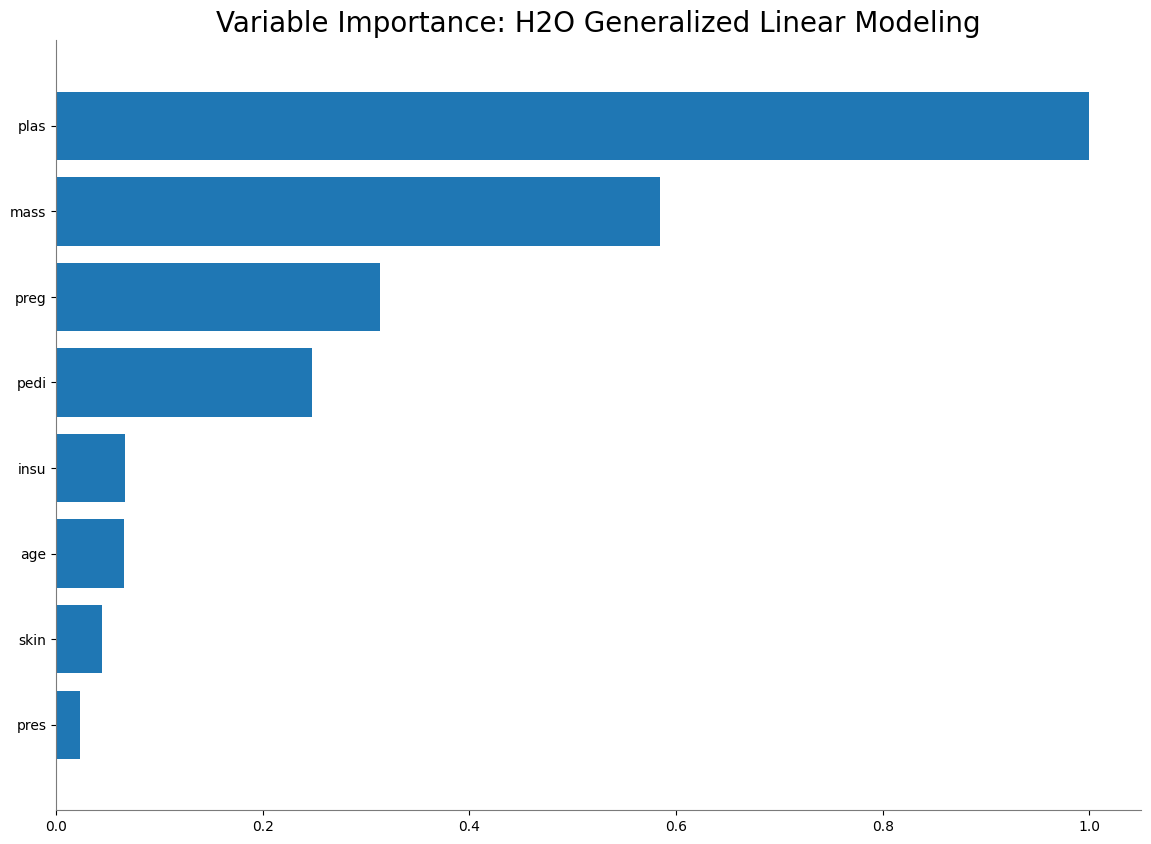

<Figure size 640x480 with 0 Axes>

In [ ]:
best_model.varimp_plot()
